<a href="https://colab.research.google.com/github/eldend/kh/blob/main/6_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**차원 축소(dimenionality reduction)**

차원이란?

다차원 배열고 1차원 배열에서 차원이란 용어는 조금 다르게 사용

다차원 배열에서 차원은 배열의 축 개수

1차원 배열에서 차원은 원소의 개수 -> 혼란을 피하기 위해 특서이라 하기로 하자

**특성이 많으면?**

장점: 선형 모델의 성능이 높아짐

단점1: 훈련 데이터에 쉽게 과대적합 됨

단점2: 데이터 용량이 급격히 증가하여 저장
공간이 부족

단점3: 모델 처리속도가 떨어짐

---
차원축소는 데이터를 가장 잘 나타내는 일부 특성만을 선태갛여 데이터 크기를 줄이고 지도
학습 모델의 성능을 향상시킬 수 있음 줄어든
차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원할 수 있음

** 주성분 분석(PCA, Principla component analysis)**

대표적인 차원 축소 알고리즘

데이터에 있는 분산이 큰 방향을 찾는 것

분산은 데이터가 널리 퍼져있는 정도

분산이 큰 방향이란 데이터를 잘 표현하는 어떤 벡터(데이터를 표현하는데 적합)


---


사이킷런의 PCA 모델은 특성마다 편균값을 빼서 원점에 자동으로 맞춤

원래 특성은 2개이지만 하나의 주성분으로 데이터를 표현한다면 2개의 특성이 하나로 줄어들었기 때문에 차원이 축소되었다고 말할 수 있음

위 그림은 점 S(4, 2)는 주성분 벡터에 직각이 더ㅣ는 위치인 점 P (4,5)로 투영 가능

즉, 4와 2라는 2개의 특성이 하나의 특성 4, 5로 변환

주성분 벡터의 원소 개수는 원본 데이터 세트와 동일하나 원본 데이터는 주성분을 사용해 차원을 줄일 수 있음(물론 손실이 발생함)

일반적으로 주성분은 이를 반복하여
그러나 이렇게 하면 차원 축소 효과가 없으므로 원본 특성 개수보다 적게 찾아서 사용

이전 절과 마찬가지로 과일 사진 데이터 다운로드

In [2]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-10-30 01:42:38--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-10-30 01:42:38--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-10-30 01:42:39--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... con

In [3]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

주성분 알고리즘은 sklearn,decompositon 모듈 아래 PCA 클래스를 import하여 사용할 수 있음

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [5]:
print(pca.components_.shape)

(50, 10000)


n_components: 주성분의 개수를 지정하는데 필수로 사용해야 하는 매개변수

첫 번째 차원은 50, 즉, 50개의 주성분을 찾음

두 번째 차원은 항상 원본 데이터의 특성 개수와 같으므로 10000

주의할 점: 주성뷴 벡터의 크기는 원본 데이터와 동일함

주성분을 이미지처럼 출력해 보자

이전 절에서 만든 draw_fruits()

In [6]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

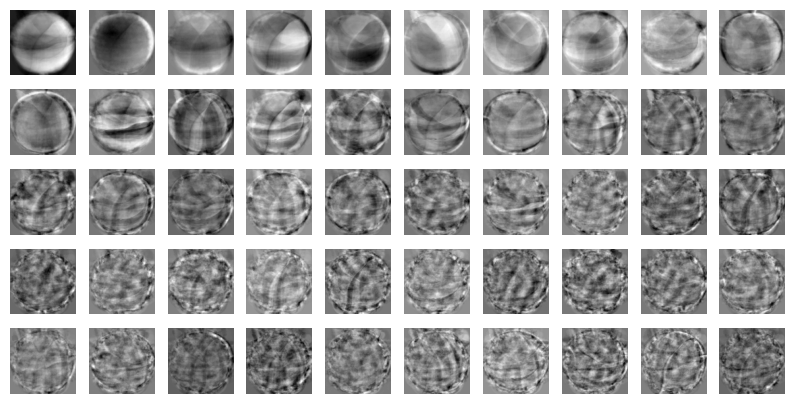

In [7]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타냄

데이터 세트에 있는 어떤 특징을 잡아낸 것으로 생각할 수 있음

찾아낸 주성분을 이용하여 우너본 데이터의 특성을 50으로 줄여보자

In [8]:
print(fruits_2d.shape)

(300, 10000)


In [9]:
fruits_pca = pca.transform(fruits_2d)

In [10]:
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성

In [11]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [12]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

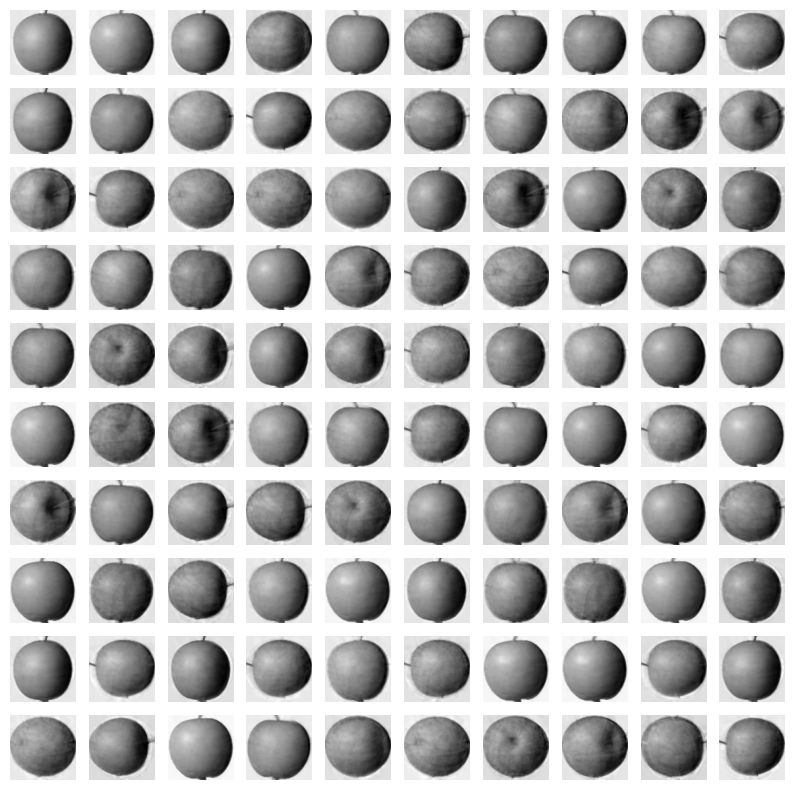

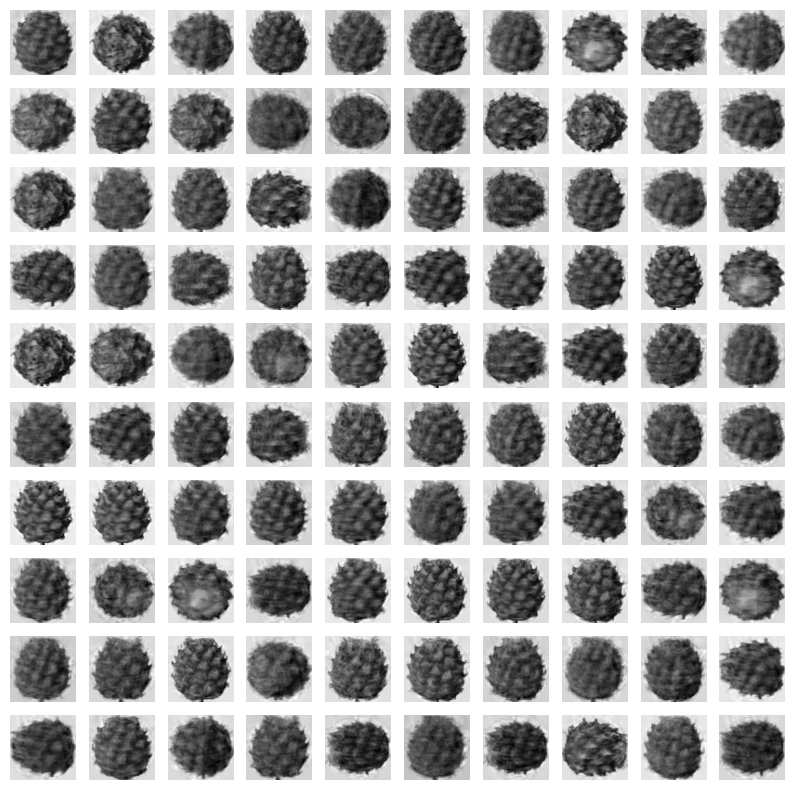

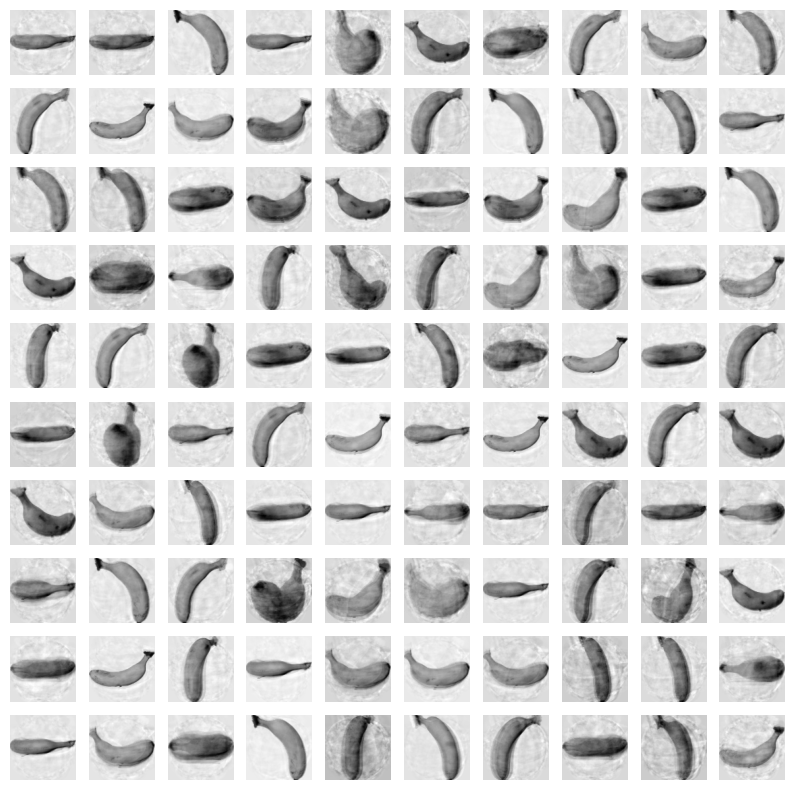

In [13]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

주성분을 최대로 사용하면 거이 완벽하게 원본 데이터를 재구성 할 수 있음

##설명된 분산(explained variance)

주성분이 원본 데이터의 분산을 어마나 잘 나타내는지 기록한 값

PCA클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록되어 있음

이 분산 비율을 모두 더하면 50개의 분산 비율을 얻을 수 있음


In [15]:
print(np.sum(pca.explained_variance_ratio_))

0.9214750554082876


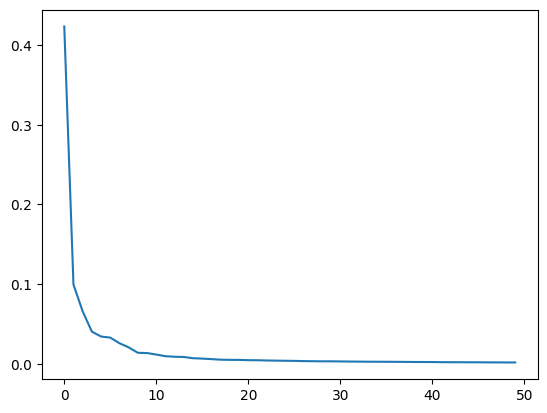

In [14]:
plt.plot(pca.explained_variance_ratio_)

처음 10개의 주성분이 대부분의 분산을 표현하고 있음

 **과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용하고 차이를 찾아보자**

3개의 과일 사진을 분류해야 하므로 로지스틱 회귀 모델을 사용해 봄

지도 핛습 모델이므로 타깃값을 설정

사과 = 0, 파인애플 = 1, 바나나 = 2

## 다른 알고리즘과 함께 사용하기

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [17]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [21]:
#원본 데이터인 fruits_2d 사용
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time'])) # 초 단

0.9966666666666667
1.7860345840454102


In [20]:
#PCA로 축소한 fruits_pca를 사용
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.02044849395751953


PCA로 훈련 데이터의 차원을 축소하면 저장 공간뿐만 아니라 머신러닝 모델의 훈련 속도도 높일 수 있음



---


주성분의 개수 대신 분산의 비율로 주성분을 찾을 수 있음

설명된 분산의 50%에 달하는 주성분을 찾아보자:

In [27]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

2
0.5229877245800599


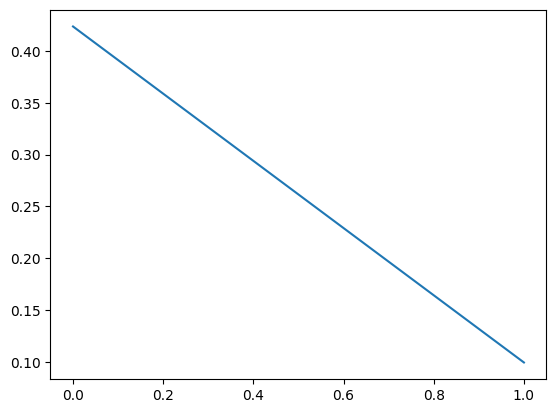

In [28]:
print(pca.n_components_)
print(np.sum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [23]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


교차 검증 수행

In [24]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.021714496612548827


2개의 특성 만으로도 99%의 정확도 달성

차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터를 찾아보자

In [29]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [30]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


2ㅈ절에서 원본 데이터를 사용했을 때 거의 비슷한 결과임

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))

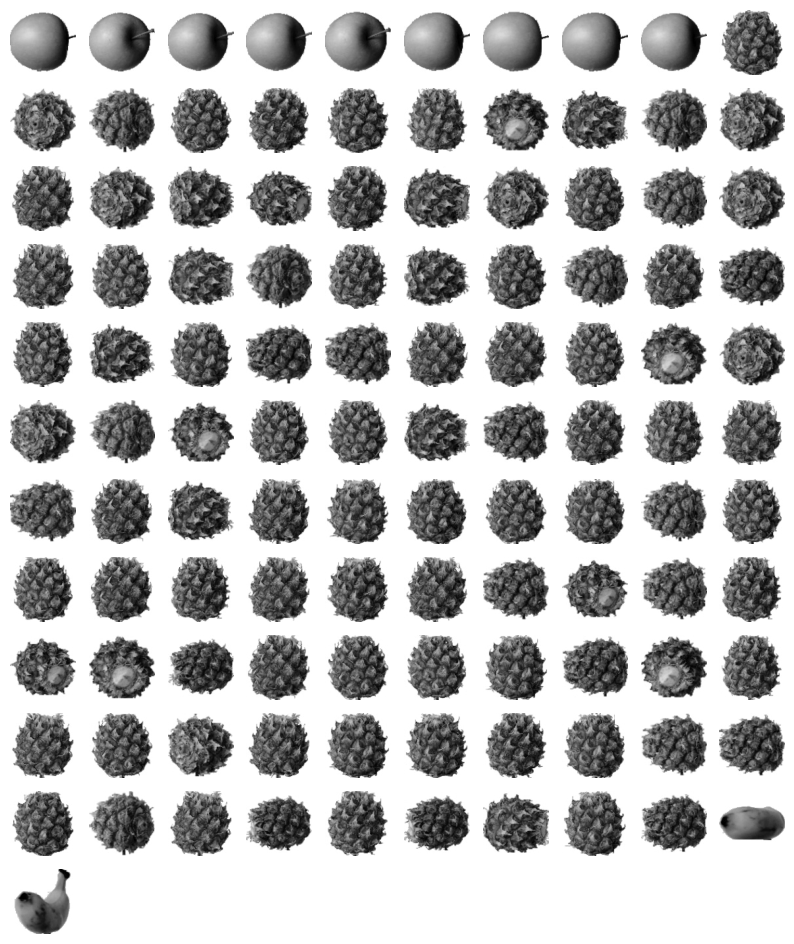

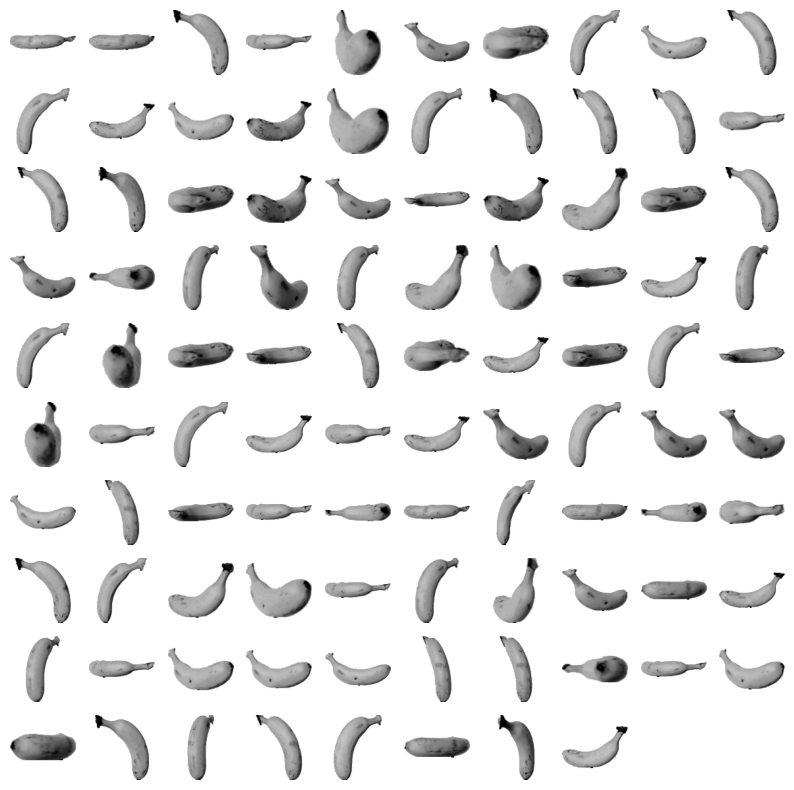

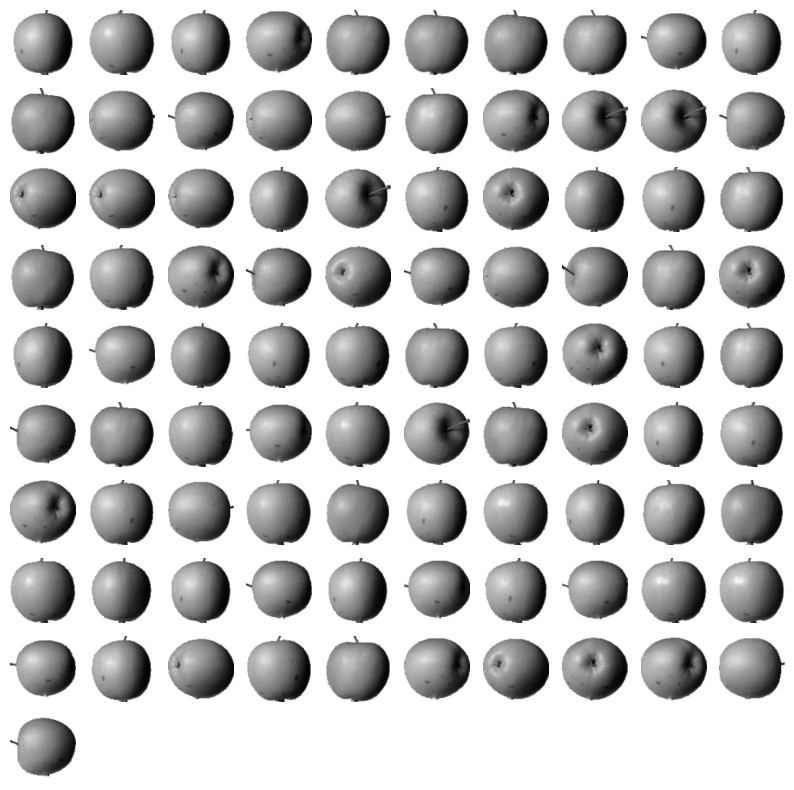

In [31]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

훈련 데이터의 차원 축소의 장점 중 하나는 시각화

3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉬움

km,.labels_ 클래스 별로 표시

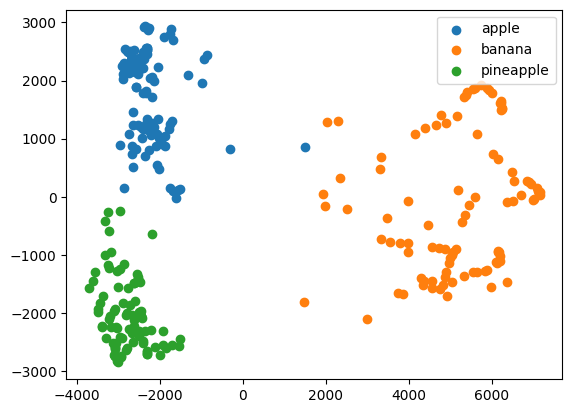

In [32]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

각 클러스터의 산점도가 잘 구분됨

실제 클래스 별로 표시

파인애플 클래스터의 경계와 가까운 샘플이 틀림

데이터를 시각화하면 예상치 못한 통찰을 얻을 수 있음



---



차원 축소의 장점

1. 과대적합 억제

2. 저장 공간 확보

3. 모델 처리속도 상승

4. 모델 성능 상승

5. 시각화 기능

In [ ]:
np.array()